## Transformation of Twitter Stream Data

In [95]:
import pandas as pd
import re
from numpy import *
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [96]:
df = pd.read_csv("../Desktop/got_tweets.csv")

## Cleaning Steps

In [97]:
#Clean 'Sources' field.
def clean_text(text):
    sources = ['Android', 'iPhone', 'Web']
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word in sources]
    return text

df['source_cleaned'] = df['source'].apply(lambda x: clean_text(x))

def cleaning(x):
    sources = ['Android', 'iPhone', 'Web']
    for i in x:
        if i in sources:
            return i
        else:
            return " "
        
df['source_cleaned_2'] = df['source_cleaned'].apply(lambda x: cleaning(x))



#drop unnecessary columns
df_cleaned = df.drop(['id_str','user_id_str','user_name','user_protected','retweeted_status_id_str','user_geo_enabled','retweeted_status_created_at','user_lang','timestamp_ms','user_url','source','in_reply_to_status_id','in_reply_to_user_id','in_reply_to_status_id_str','source_cleaned'], axis=1)

In [98]:
df_cleaned.head()

,created_at,id,text,truncated,in_reply_to_screen_name,user_id,user_screen_name,user_location,user_description,user_verified,...,user_created_at,user_time_zone,retweeted_status_id,retweet_count,favorite_count,entities_hashtags_text,favorited,retweeted,lang,source_cleaned_2
0,2018-05-23 04:31:35 UTC,999145795084468224,https://t.co/VBt0NRD72r,False,aprillia_rb,725885344994889729,aprillia_rb,United States,i'm Artist in redbubble :),False,...,2016-04-29 03:12:07 UTC,Pacific Time (US & Canada),NaN,NaN,NaN,NaN,False,False,und,Web
1,2018-05-23 04:52:32 UTC,999151069404979200,RT @FilmCerita: Karakter2 Game Of Thrones fav ...,False,NaN,111027257,foeyfvvk,NaN,NaN,False,...,2010-02-03 15:25:12 UTC,Jakarta,9.989431e+17,NaN,NaN,NaN,False,False,in,Android
2,2018-05-23 04:33:16 UTC,999146219095187461,@jt_kerwin @usher_andrew @GameOfThrones omg th...,False,jt_kerwin,2997573846,SHamiltonian,"Chicago, IL",Assistant Professor of economics at @GWtweets ...,False,...,2015-01-26 23:37:21 UTC,Pacific Time (US & Canada),NaN,NaN,NaN,NaN,False,False,en,Web
3,2018-05-23 04:42:24 UTC,999148516134940673,RT @verasitytech: Imagine supporting a video c...,False,NaN,932961857639391234,Siwicatur2,"Jawa Tengah, Indonesia",NaN,False,...,2017-11-21 13:20:15 UTC,NaN,9.991341e+17,NaN,NaN,NextGenVideo,False,False,en,Android
4,2018-05-23 04:42:24 UTC,999148516134940673,RT @verasitytech: Imagine supporting a video c...,False,NaN,932961857639391234,Siwicatur2,"Jawa Tengah, Indonesia",NaN,False,...,2017-11-21 13:20:15 UTC,NaN,9.991341e+17,NaN,NaN,VERA,False,False,en,Android


## Creating tables for MySQL

### Tweet Table

In [99]:
tweet_table = df_cleaned[['created_at','id','source_cleaned_2','user_screen_name','user_followers_count','user_location','text','entities_hashtags_text','lang','in_reply_to_screen_name','retweet_count','retweeted','favorite_count','favorited']]

In [100]:
tweet_table.head()

,created_at,id,source_cleaned_2,user_screen_name,user_followers_count,user_location,text,entities_hashtags_text,lang,in_reply_to_screen_name,retweet_count,retweeted,favorite_count,favorited
0,2018-05-23 04:31:35 UTC,999145795084468224,Web,aprillia_rb,1373.0,United States,https://t.co/VBt0NRD72r,NaN,und,aprillia_rb,NaN,False,NaN,False
1,2018-05-23 04:52:32 UTC,999151069404979200,Android,foeyfvvk,471.0,NaN,RT @FilmCerita: Karakter2 Game Of Thrones fav ...,NaN,in,NaN,NaN,False,NaN,False
2,2018-05-23 04:33:16 UTC,999146219095187461,Web,SHamiltonian,156.0,"Chicago, IL",@jt_kerwin @usher_andrew @GameOfThrones omg th...,NaN,en,jt_kerwin,NaN,False,NaN,False
3,2018-05-23 04:42:24 UTC,999148516134940673,Android,Siwicatur2,1535.0,"Jawa Tengah, Indonesia",RT @verasitytech: Imagine supporting a video c...,NextGenVideo,en,NaN,NaN,False,NaN,False
4,2018-05-23 04:42:24 UTC,999148516134940673,Android,Siwicatur2,1535.0,"Jawa Tengah, Indonesia",RT @verasitytech: Imagine supporting a video c...,VERA,en,NaN,NaN,False,NaN,False


#### A look at tweet sources more closely.

In [103]:
source = pd.crosstab(tweet_table.source_cleaned_2,tweet_table.lang)
source

lang,ar,bg,ca,ckb,cs,cy,da,de,el,en,...,ru,sr,sv,th,tl,tr,uk,und,vi,zh
source_cleaned_2,,,,,,,,,,,,,,,,,,,,,
Android,213,1,13,0,11,12,3,147,32,10163,...,31,0,6,1128,134,692,0,1061,1,1
Web,38,0,10,0,3,3,1,47,18,6392,...,8,7,26,67,36,147,2,1205,0,0
iPhone,605,0,23,1,8,16,3,79,3,12101,...,5,0,3,845,37,418,0,709,0,4


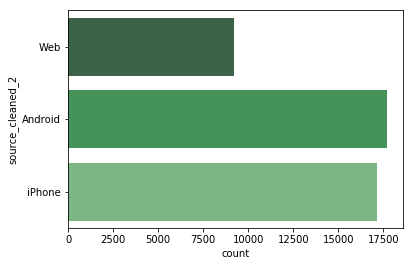

In [104]:
sns.countplot(y="source_cleaned_2", data=tweet_table, palette="Greens_d")

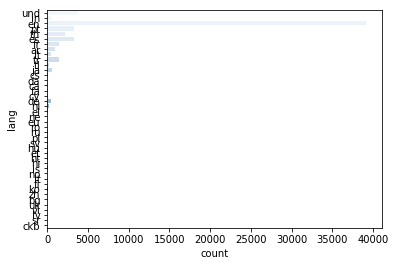

In [105]:
sns.countplot(y="lang", data=tweet_table, palette="Blues")

### Twitter Users Table

In [106]:
#Select fields from original Twitter dataset
user_table = df[['user_id','user_screen_name','user_created_at','user_location','user_description','user_verified','user_followers_count','user_statuses_count']]

#Sort records in descending order of their total statuses - this means that this is their most recent record.
user_table.sort_values(by=['user_statuses_count'],ascending=False)

#Remove duplicates by user ID - keep the first record
user_table_1 = user_table.drop_duplicates(['user_screen_name'],keep='first')
user_table_1.count()

user_id                 35641
user_screen_name        35641
user_created_at         35641
user_location           25074
user_description        30722
user_verified           35641
user_followers_count    35385
user_statuses_count     35641
dtype: int64

In [107]:
user_table_1.head(10)

,user_id,user_screen_name,user_created_at,user_location,user_description,user_verified,user_followers_count,user_statuses_count
0,725885344994889729,aprillia_rb,2016-04-29 03:12:07 UTC,United States,i'm Artist in redbubble :),False,1373.0,50621
1,111027257,foeyfvvk,2010-02-03 15:25:12 UTC,NaN,NaN,False,471.0,42228
2,2997573846,SHamiltonian,2015-01-26 23:37:21 UTC,"Chicago, IL",Assistant Professor of economics at @GWtweets ...,False,156.0,815
3,932961857639391234,Siwicatur2,2017-11-21 13:20:15 UTC,"Jawa Tengah, Indonesia",NaN,False,1535.0,1598
5,369087818,natyybautista,2011-09-06 19:02:37 UTC,buenos aires,#RiverPlate mi vida @backstreetboys mis amore...,False,456.0,34554
8,231653613,YhurPoint_,2010-12-29 03:23:46 UTC,"Dnt worry about it,not w/you🤫",✨Ephesians 3:14✨~Not everyone is trying to hur...,False,1419.0,139935
9,453028557,Colobeng_,2012-01-02 14:10:49 UTC,"Accra, Ghana",know what’s real.,False,1600.0,36677
10,519183352,__kingsrock,2012-03-09 04:39:12 UTC,"MTL, Canada",idk what im doing,False,526.0,5559
11,2783138287,Eddie_RufDady,2014-08-31 23:37:55 UTC,NaN,"http://Myfreecams.com: Eddie_RufDady, from Win...",False,96.0,2214
12,64737042,donnahhhhh,2009-08-11 15:07:27 UTC,"Pensacola, FL and Green Bay WI",Hopeless romantic with big dreams. Nautre Feel...,False,210.0,3168


## SENTIMENT CLASSIFIER

In [108]:
from sklearn.utils import shuffle
import json

#CLEANING DATA
import string #for function removing punctuation
import re #for tokenization
import nltk #for removing stop words 
ps = nltk.PorterStemmer() #for stemming
wn = nltk.WordNetLemmatizer() #for lemmatizing

#VECTORIZING DATA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#MODELING DATA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

#### Reading in labeled tweets from Kaggle for training.

In [109]:
tweets = pd.read_csv("../Desktop/InfinityWars/training_tweets_1.csv", encoding='latin-1', header=None)
tweets = shuffle(tweets)
tweets.columns = ["sentiment", "id", "date", "query", "user", "text"]
tweets = tweets.drop(["id", "date", "query", "user"], axis = 1)
tweets_1 = tweets[0:50000]

#### Cleaning tweets

In [110]:
def clean_text(text):
    stopword = nltk.corpus.stopwords.words('english')
    text = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [111]:
tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(tweets_1['text'])
X_features = tfidf_vect.fit_transform(tweets_1['text'])

#### Applying Random Forest

In [112]:
rf = RandomForestClassifier(n_jobs = -1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, tweets_1['sentiment'],cv = k_fold, scoring = 'accuracy', n_jobs=-1)

array([0.7169, 0.7227, 0.7218, 0.7247, 0.7199])

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_features,tweets_1['sentiment'], test_size = .2)
rdf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rdf_model = rdf.fit(X_train, y_train)

y_pred = rdf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label = 4, average = 'binary')

In [114]:
print(precision)
print(recall)

0.7108742845865403
0.7230028101164191


#### Apply to Game of Thrones data.

In [115]:
tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(tweets_1['text'])
Y_tfidf = tfidf_vect.transform(tweet_table['text'])

In [116]:
got_sentiment = rdf_model.predict(Y_tfidf)
got_sentiment_df = pd.DataFrame(got_sentiment)
got_sentiment_df.columns = ['sentiment']

In [117]:
tweet_table = tweet_table.join(got_sentiment_df)
tweet_table.head()

,created_at,id,source_cleaned_2,user_screen_name,user_followers_count,user_location,text,entities_hashtags_text,lang,in_reply_to_screen_name,retweet_count,retweeted,favorite_count,favorited,sentiment
0,2018-05-23 04:31:35 UTC,999145795084468224,Web,aprillia_rb,1373.0,United States,https://t.co/VBt0NRD72r,NaN,und,aprillia_rb,NaN,False,NaN,False,4
1,2018-05-23 04:52:32 UTC,999151069404979200,Android,foeyfvvk,471.0,NaN,RT @FilmCerita: Karakter2 Game Of Thrones fav ...,NaN,in,NaN,NaN,False,NaN,False,4
2,2018-05-23 04:33:16 UTC,999146219095187461,Web,SHamiltonian,156.0,"Chicago, IL",@jt_kerwin @usher_andrew @GameOfThrones omg th...,NaN,en,jt_kerwin,NaN,False,NaN,False,4
3,2018-05-23 04:42:24 UTC,999148516134940673,Android,Siwicatur2,1535.0,"Jawa Tengah, Indonesia",RT @verasitytech: Imagine supporting a video c...,NextGenVideo,en,NaN,NaN,False,NaN,False,4
4,2018-05-23 04:42:24 UTC,999148516134940673,Android,Siwicatur2,1535.0,"Jawa Tengah, Indonesia",RT @verasitytech: Imagine supporting a video c...,VERA,en,NaN,NaN,False,NaN,False,4
